# West Nile Virus Prediction


## Introduction

West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today. 

Since the implementation of comprehensive surveillance and control programmes, the number of West Nile Virus detected at the state-level has proven effective as the cases in Illinois (where Chicago is the city with the largest population) trended lower than other states (e.g. California) facing higher incidences of West Nile Virus. 

![Incidence of West Nile Virus](../images/WNV_Cases.jpg)
Source: [CDC](https://www.cdc.gov/westnile/statsmaps/cumMapsData.html)

The current strategies undertaken to reduce threat of West Nile Virus for Chicago's residents includes:
- Treating catch basins in Chicago with larvicide
- Placement of mosquito traps throughout the city for testing of mosquito samples on a weekly basis 
- Aerial spraying of pesticides  

Source: [Chicago Government](https://www.chicago.gov/city/en/depts/cdph/provdrs/health_protection_and_response/news/2021/july/cdph-conducts-a-comprehensive-mosquito-surveillance-and-control-.html)

### We will work through each step of the Data Science method to complete this capstone project
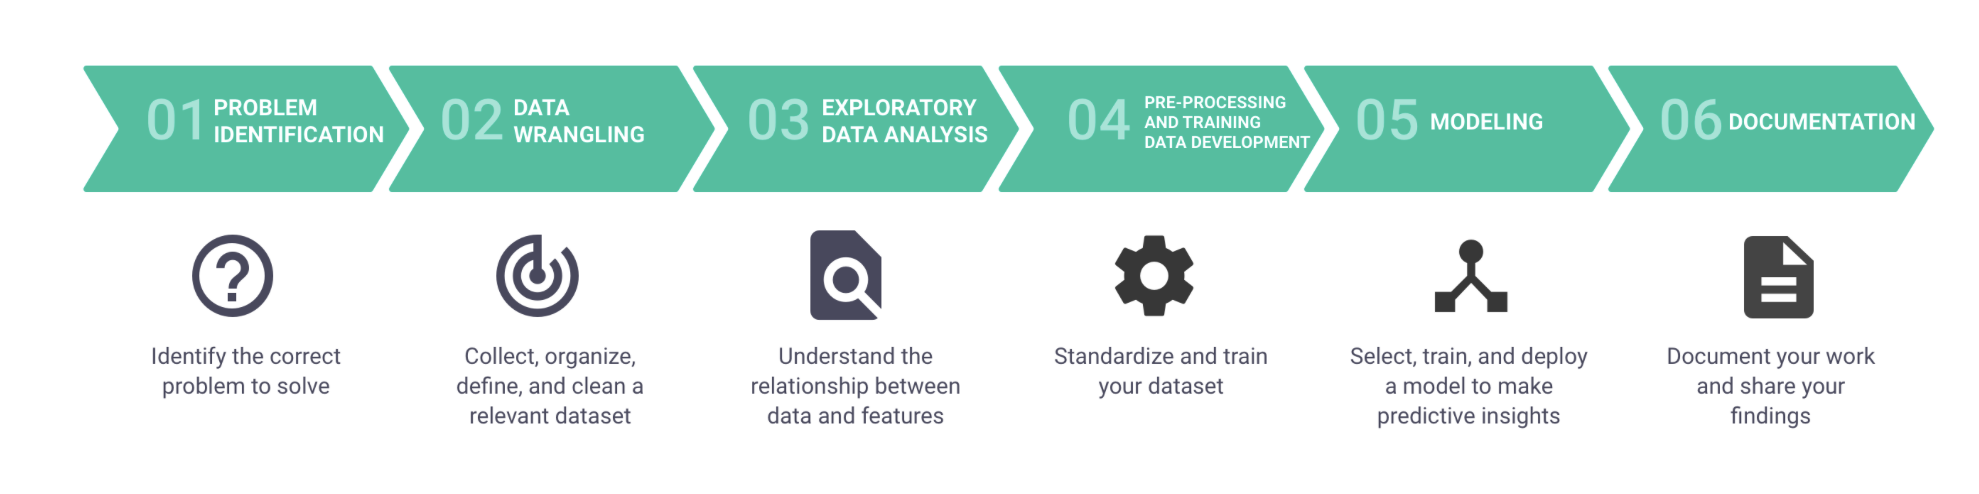

### Step 1 : Problem Identification

## Problem Statement

Recognising that the West Nile Virus is likely to be an endemic issue, The purpose of this Machine Learning project is to come up with a predictive model to improve the cost-effectiveness of the existing strategies to control the adult mosquito populations and mitigate the spread of the virus. This can help the City of Chicago achieve cost savings and more efficiently allocate resources towards preventing transmission of this potentially deadly virus.

An ideal model would meet the following requirements:


|Requirements|Rationale|Data Science Metric|
|:---|:---|:---|
|Strong predictive powers| Effective use of past data points for predictions|Receiver Operating Characteristic Area Under Curve (ROC AUC)|
|Ability to identify virus when it is indeed present|Ensures that locations with the virus can be identified and treated|Recall|
|Precise positive prediction of virus presence|Low precision would lead to more (costly) sprays than necessary| Sensitivity|

## Data

The datasets obtained from [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data) used to develop the machine learning model for predictions are are as follows. 

|Data|Description|
|:---:|:---|
|[`train.csv`](../assets/train.csv)|There are 10,505 raw observations. Each observation contains location details on the traps, the number of mosquitoes collected and an indication of whether the West Nile Virus is present. The data is for traps tested in years 2007, 2009, 2011 and 2013.| 
|[`test.csv`](../assets/test.csv)|There are 116,293 raw observations. Each observation contains location details on the traps, the number of mosquitoes collected and an indication of whether the West Nile Virus is present. The data is for traps tested in years 2008, 2010, 2012, and 2014.| 
|[`weather.csv`](../assets/weather.csv)|Weather data collected from 2 weather stations between 1 May and 31 Oct from 2007 to 2014. For further descriptions, see [pdf](../assets/noaa_weather_qclcd_documentation.pdf).|
|[`spray.csv`](../assets/spray.csv)|Data contains the date, time and location of spray in 2011 and 2013. This dataset will only be used for the benefit and costs analysis of pesticide use (see Book 5) and will not be used to build the prediction model.|

The data dictionary of the newly engineered features is found below. For description about original data, please refer to [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data):

|Feature|Type|Description|
|:---|:---:|:---|
|Tmin_L0|*float*|Average minimum temperature of the weather station closest to the trap within the same month.| 
|Tmin_L1|*float*|Average minimum temperature of the weather station closest to the trap in the previous month.| 
|Tmax_L0|*float*|Average maximum temperature of the weather station closest to the trap within the same month.| 
|Tmax_L1|*float*|Average maximum temperature of the weather station closest to the trap in the previous month.| 
|SeaLevel_L0|*float*|Average atmospheric pressure of the weather station closest to the trap within the same month.| 
|SeaLevel_L1|*float*|Average atmospheric pressure of the weather station closest to the trap in the previous month.| 
|RelativeHumidity|*float*|Relative humidity computed based on dewpoint and average temperature using the formula given at [link](https://www.calcunation.com/calculator/humidity-calculator.php).| 
|RelativeHumidity_L0|*float*|Average relative humidity of the weather station closest to the trap within the same month.| 
|RelativeHumidity_L1|*float*|Average relative humidity of the weather station closest to the trap in the previous month.| 
|PrecipTotal_L0|*float*|Average total precipitation reading of the weather station closest to the trap within the same month.| 
|PrecipTotal_L1|*float*|Average total precipitation reading of the weather station closest to the trap in the previous month.| 
|DewPoint_L0|*float*|Average dewpoint temperature reading of the weather station closest to the trap within the same month.| 
|DewPoint_L1|*float*|Average dewpoint temperature reading of the weather station closest to the trap in the previous month.| 
|AvgSpeed_L0|*float*|Average wind speed reading of the weather station closest to the trap within the same month.| 
|AvgSpeed_L1|*float*|Average wind speed reading of the weather station closest to the trap in the previous month.| 
|PIPIENS|*integer*|Dummy variable = 1 if Pipiens species is found within the trap and = 0 if otherwise.| 
|RESTUANS|*integer*|Dummy variable = 1 if Restauns species is found within the trap and = 0 if otherwise.| 
|WnvRisk_very low|*integer*|Dummy variable = 1 if between 0 and 2 cases of WNV were detected in the past and = 0 if otherwise.| 
|WnvRisk_low|*integer*|Dummy variable = 1 if between 2 and 6 cases of WNV were detected in the past and = 0 if otherwise.| 
|WnvRisk_medium|*integer*|Dummy variable = 1 if between 6 and 10 cases of WNV were detected in the past and = 0 if otherwise.| 
|WnvRisk_high|*integer*|Dummy variable = 1 if more than 10 cases of WNV were detected in the past and = 0 if otherwise.| 
|Rain|*integer*|Dummy variable = 1 if there was an event of either torrential storm, rain, drizzle or shower and = 0 if otherwise.| 
|Mist|*integer*|Dummy variable = 1 if there was an event of either fog, mist, haze or smoke and = 0 if otherwise.| 

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### Step 2: Data Wrangling

## Spray Data

#### Libraries & Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

In [2]:
# import Kaggle dataset
spray = pd.read_csv("../data/spray.csv")

## Data Overview

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
# Identify missing data
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

There are > 500 missing values for `Time`. Given that it is not crucial for our analysis, we will drop it.

In [5]:
# drop Time data from dataset
spray.drop(["Time"], axis=1, inplace=True)

In [6]:
# save Date as pandas' datetime format
spray["Date"] = pd.to_datetime(spray["Date"])

In [7]:
spray.drop_duplicates(keep="first", inplace=True, ignore_index=True)

In [8]:
# check dataset
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14294 non-null  datetime64[ns]
 1   Latitude   14294 non-null  float64       
 2   Longitude  14294 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 335.1 KB


## Removal of outliers 

In [9]:
# the BBox for the map provided in the asset folder is (-88, -87.5, 41.6, 42.1)

# check if the range of coordinates are within the map provided 
BBox_spray = ((spray.Longitude.min(), spray.Longitude.max(),
        spray.Latitude.min(), spray.Latitude.max()))

BBox_spray

(-88.0964683333333, -87.5867266666667, 41.713925, 42.3959833333333)

In [10]:
# drop sprays that took place at coordinates outside the map provided
spray = spray.loc[spray["Latitude"] < 42.1]
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14199 non-null  datetime64[ns]
 1   Latitude   14199 non-null  float64       
 2   Longitude  14199 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 443.7 KB


### Saving cleaned dataset

In [11]:
spray.to_csv('../data/spray_cleaned.csv', index=False)

In [12]:
spray.head()

,Date,Latitude,Longitude
95,2011-09-07,41.981433,-87.787777
96,2011-09-07,41.980998,-87.787778
97,2011-09-07,41.980560,-87.787762
98,2011-09-07,41.980198,-87.787758
99,2011-09-07,41.979752,-87.787765


In [13]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14199 entries, 95 to 14293
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14199 non-null  datetime64[ns]
 1   Latitude   14199 non-null  float64       
 2   Longitude  14199 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 443.7 KB


## Weather Data

In [14]:
# import Kaggle dataset
weather = pd.read_csv("../data/weather.csv")

In [15]:
#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

# display sample of dataset
pd.set_option('display.max_columns', None)
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [16]:
weather.tail()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2939,2,2014-10-29,49,40,45,M,34,42,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,0622,1649,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,0623,1647,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9
2943,2,2014-10-31,49,34,42,M,29,36,23,0,-,-,RA SN BR,M,M,M,0.04,29.54,30.20,21.7,34,22.6


In [17]:
# save Date as pandas' datetime format
weather["Date"] = pd.to_datetime(weather["Date"])

#### According to [this link](https://w2.weather.gov/climate/f6.php), it seems like all the missing values are denoted by "M". We replace "M" with `np.nan` to identify missing values in our data. 

In [18]:
# replace all "M" values with np.nan 
weather[weather=="M"]=np.nan

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      object        
 15  SnowFall     1472 non-null   object        
 16  Precip

### Saving cleaned dataset

In [20]:
weather.to_csv('../data/weather_cleaned.csv', index=False)

In [21]:
# import original Kaggle datasets 
train = pd.read_csv("../data/train.csv")

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [23]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [24]:
# drop multiple columns containing address information as they are duplicated info within the dataframe
train.drop(["Address", "Block", "Street", "AddressAccuracy"], axis=1, inplace=True)

In [25]:
train.head(3)

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,1,0


In [26]:
train.shape

(10506, 8)

In [27]:
train.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Latitude,10506.0,41.841,0.113,41.645,41.733,41.846,41.955,42.017
Longitude,10506.0,-87.700,0.097,-87.931,-87.760,-87.695,-87.628,-87.532
NumMosquitos,10506.0,12.854,16.134,1.000,2.000,5.000,17.000,50.000
WnvPresent,10506.0,0.052,0.223,0.000,0.000,0.000,0.000,1.000
